#### My Approch To Face Detection:


Script By: https://www.linkedin.com/in/aibysalman/

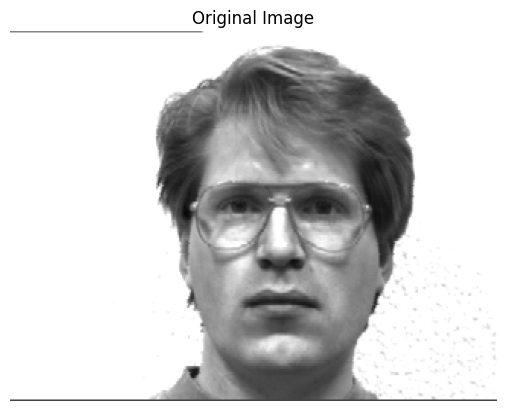

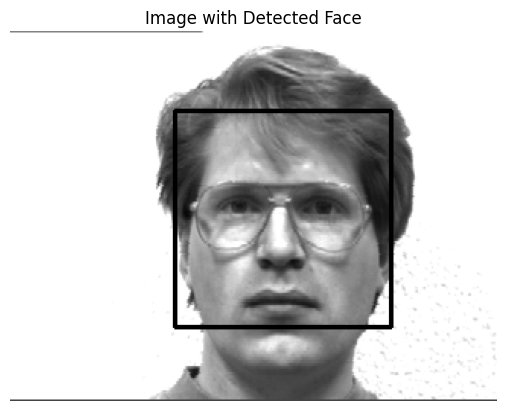

In [18]:
import cv2
import matplotlib.pyplot as plt

img = plt.imread("faces/subject01.glasses")
face_cascade = cv2.CascadeClassifier("frontface.xml")

if len(img.shape) == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.title("Original Image")
plt.axis("off")
plt.show()

scaleFactor = 1.1
minNeighbors = 3  

faces = face_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)

if len(faces) > 0:
    
    largest_face = max(faces, key=lambda face: face[2] * face[3])
    x, y, w, h = largest_face

    
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Image with Detected Face")
    plt.axis("off")
    plt.show()
else:
    print("No face detected in the image.")


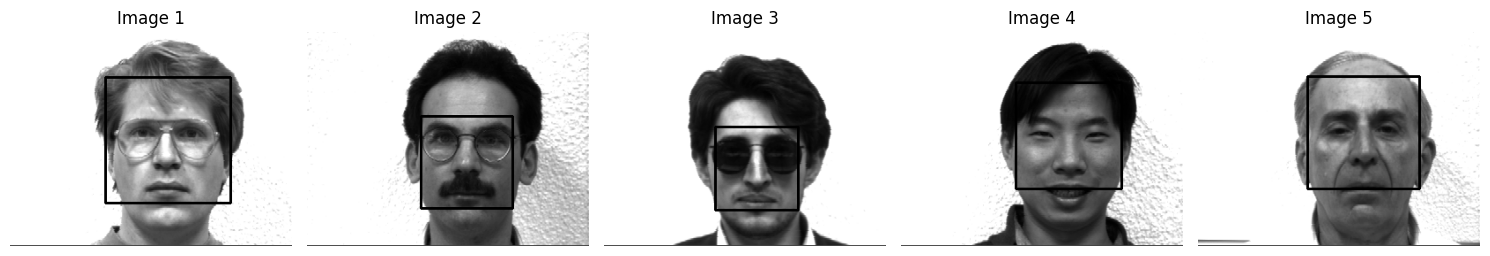

In [21]:
import cv2
import matplotlib.pyplot as plt

def detect_and_draw_faces(image_path, face_cascade):
    img = plt.imread(image_path)
    
    if img is None:
        print(f"Error: Image {image_path} not loaded or not found.")
        return None
    
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    scaleFactor = 1.1
    minNeighbors = 3
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)

    if len(faces) > 0:
        largest_face = max(faces, key=lambda face: face[2] * face[3])
        x, y, w, h = largest_face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return img
    else:
        return None


face_cascade = cv2.CascadeClassifier("frontface.xml")


image_paths = ["faces/subject01.glasses", "faces/subject02.glasses", "faces/subject03.glasses", "faces/subject04.happy", "faces/subject05.normal"]


num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, image_path in enumerate(image_paths):
    result_img = detect_and_draw_faces(image_path, face_cascade)
    if result_img is not None:
        axes[i].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"No face detected in Image {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
